In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
df = pd.read_csv('mnist_train.csv')

In [4]:
df.shape

(60000, 785)

In [5]:
df.sample()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
14397,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
import matplotlib.pyplot as plt

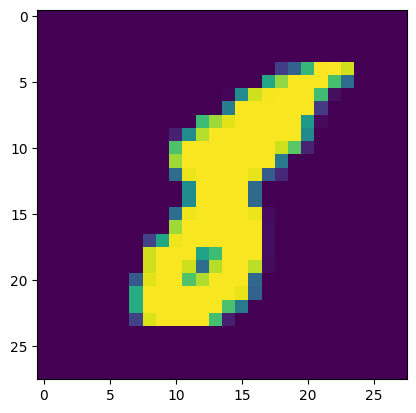

In [7]:
plt.imshow(df.iloc[13051,1:].values.reshape(28,28))

In [8]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
X_train.shape

(48000, 784)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn = KNeighborsClassifier()

In [13]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [14]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time() - start)

25.196571111679077


In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

97.15

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=200)

In [20]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [21]:
X_train_trf.shape

(48000, 200)

In [22]:
knn = KNeighborsClassifier()

In [23]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [24]:
y_pred = knn.predict(X_test_trf)

In [25]:
accuracy_score(y_test,y_pred)

0.955

In [27]:
for i in range(1,785):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)
    
    knn = KNeighborsClassifier()
    
    knn.fit(X_train_trf,y_train)
    
    y_pred = knn.predict(X_test_trf)
    
    print(accuracy_score(y_test,y_pred)*100)
    

26.28333333333333
31.64166666666667
50.74166666666666
66.33333333333333
74.05833333333334
82.54166666666667
83.83333333333334
87.24166666666666
88.47500000000001
90.83333333333333
91.54166666666667
91.96666666666667
92.72500000000001
93.59166666666667
94.04166666666667
94.21666666666667
94.29166666666666
94.425
94.75
95.01666666666667
94.99166666666666
94.94166666666666
95.15833333333333
95.28333333333333
95.35
95.38333333333333
95.45
95.49166666666666
95.525
95.675
95.63333333333334
95.71666666666667
95.71666666666667
95.78333333333333
95.8
95.76666666666667
95.7
95.75833333333334
95.81666666666668
95.72500000000001
95.76666666666667
95.775
95.79166666666666
95.825
95.8
95.83333333333334
95.825
95.92500000000001
95.91666666666666
95.975
96.0
95.95833333333333
95.99166666666666
95.93333333333334
95.92500000000001
95.91666666666666
95.90833333333333
95.92500000000001
95.90833333333333
95.95
96.025
95.96666666666667
96.03333333333333
95.92500000000001
95.94166666666666
95.90833333333333


KeyboardInterrupt: 

In [28]:
# transforming to a 2D coordinate system
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [29]:
X_train_trf

array([[ -0.04285026,  -1.92217345],
       [  8.15958855,  -4.4961712 ],
       [ -7.50488223,  -3.71910867],
       ...,
       [ 10.27732442,  -9.28652151],
       [ 10.29728947, -12.41274533],
       [ -2.87743198,  -0.81213933]])

In [30]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()

In [31]:
# transforming in 3D
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [32]:
X_train_trf

array([[ -0.04285026,  -1.92217345,  -2.50233661],
       [  8.15958855,  -4.4961712 ,  -4.74209866],
       [ -7.50488223,  -3.71910867,   5.1366242 ],
       ...,
       [ 10.27732442,  -9.28652151,  -1.82594462],
       [ 10.29728947, -12.41274533,   3.29437629],
       [ -2.87743198,  -0.81213933,  -1.447647  ]])

In [35]:
pca.explained_variance_
# Eigen values

array([40.65780534, 29.35286734, 26.72542354])

In [36]:
pca.components_.shape
# Eigen vectors

(3, 784)

In [37]:
pca.explained_variance_ratio_

array([0.05702238, 0.04116726, 0.03748228])

In [38]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [39]:
pca.explained_variance_.shape

(784,)

In [40]:
pca.components_.shape

(784, 784)

In [41]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05702238, 0.09818964, 0.13567192, 0.16469803, 0.18997512,
       0.21201816, 0.23145483, 0.24899896, 0.26449107, 0.27857721,
       0.29203612, 0.30418912, 0.31541422, 0.32643714, 0.33677905,
       0.34679973, 0.35628657, 0.36553212, 0.37450139, 0.3832566 ,
       0.39165487, 0.39977906, 0.40746453, 0.41493226, 0.42213525,
       0.42907204, 0.43594926, 0.44259091, 0.44892842, 0.45509787,
       0.46114434, 0.46706145, 0.47279214, 0.47848895, 0.48409704,
       0.48949156, 0.4948431 , 0.50008162, 0.50521951, 0.51006006,
       0.51486238, 0.51961237, 0.52422734, 0.52876164, 0.5332432 ,
       0.53769768, 0.54208869, 0.54644584, 0.55075226, 0.55491002,
       0.55903357, 0.56310875, 0.56711141, 0.57106149, 0.57495932,
       0.57881571, 0.58255742, 0.58627309, 0.58991977, 0.59351945,
       0.59709068, 0.60059041, 0.60404334, 0.60748518, 0.61090121,
       0.61426725, 0.61761329, 0.62090554, 0.62413045, 0.62730982,
       0.63046295, 0.63359184, 0.63668903, 0.6397278 , 0.64275

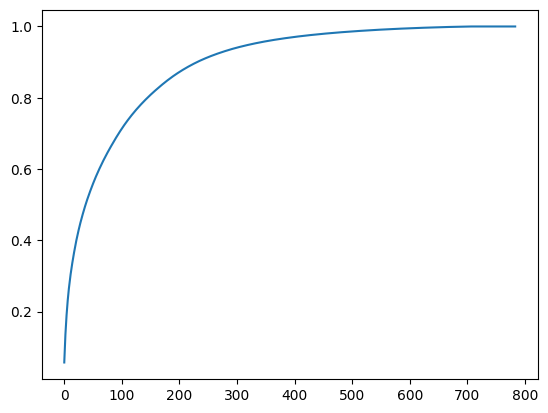

In [42]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

### Finding optimum number of principle components

### 🔍 How to Choose the Optimal Number of PCA Components using Explained Variance

Let the eigenvalues obtained from PCA be represented as:

$$
\lambda_1, \lambda_2, \lambda_3, \ldots, \lambda_n
$$

The **percentage of variance** explained by the first $k$ components is given by:

$$
\text{Explained Variance (\%)} = \left( \frac{\sum_{i=1}^{k} \lambda_i}{\sum_{i=1}^{n} \lambda_i} \right) \times 100
$$

To choose the **optimal number of components**, we select the smallest $k$ such that the cumulative explained variance exceeds a threshold (e.g., **90%** or **95%**).

---

#### ✅ Example Threshold Rule:

- Choose the smallest $k$ such that:

$$
\left( \frac{\sum_{i=1}^{k} \lambda_i}{\sum_{i=1}^{n} \lambda_i} \right) \times 100 \geq 95\%
$$

This ensures that we retain **95% of the total variance** while reducing dimensionality.

---

#### 📈 Tip: Plot the cumulative explained variance to visualize the "elbow" and help select $k$.


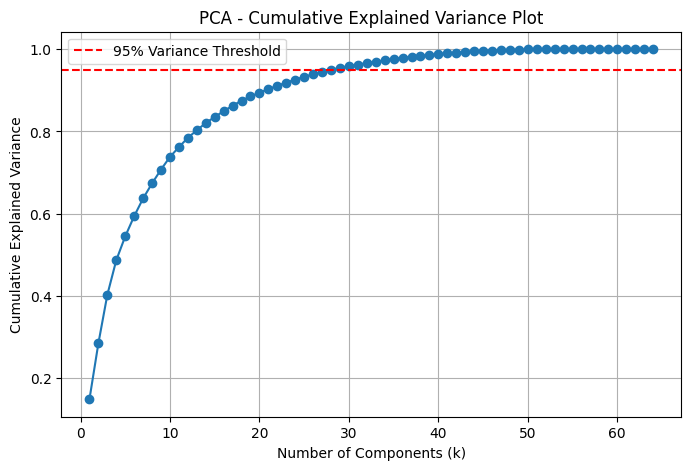

✅ Optimal number of components for 95% variance: 29


In [43]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt

# Load sample dataset
X, y = load_digits(return_X_y=True)

# Apply PCA without limiting number of components
pca = PCA()
pca.fit(X)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.xlabel('Number of Components (k)')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance Plot')
plt.legend()
plt.grid(True)
plt.show()

# Find optimal number of components
optimal_k = np.argmax(cumulative_variance >= 0.95) + 1
print(f"✅ Optimal number of components for 95% variance: {optimal_k}")


### When PCA does not work

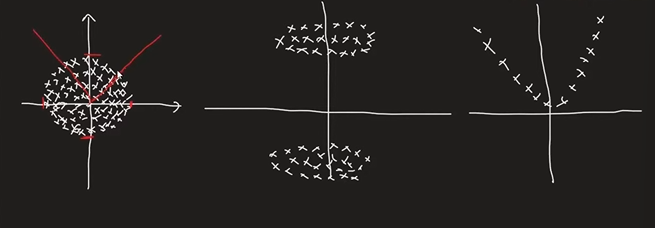

Case 1: The points are aligned in a way that no matter what we do they will have equal variance

Case 2: We might lose the data of the shape of it which might affect variance